## Problem Statement

**Using data to have a better understanding of the target customers for insurance purchases.**
<br>
<br> **Identify any seasonal influences in purchasing a product.** There could be seasons/time that will alter a person's willingness to buy. In investigating this, the marketing department can often influence/dictate, how, and when people will spend their money.  

<br> **What are the features that will distinguish one customer from each other?** The straightforward way to answer this question is using unsupervised learning technique (KMeans clustering). The goal is to group the customer data to different clusters. In such a way, each group/cluster will consist of features that will distinguish one from the other. And this will guide you to estimate how much the yearly/monthly premiums they are willing to pay or what policy the customer would most likely to purchase.  


### Contents:
- [Data](#Data)
- [Marketing calendar](#Marketing-calendar)
- [Customer segmentation](#Customer-segmentation)


In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

### Data

Import data

In [2]:
data = pd.read_csv('ins_data.csv')

In [3]:
data.shape

(16671, 34)

In [4]:
pd.set_option('display.max_columns', 50)
data.head(10)

,Unnamed: 0,policy_ref_dummy,issue_date,st_date,pol_st,product_category,prod_type,basic_cover_type,cover_type,insured_amt,premium,pay_term,pay_method,pay_mode,pay_age,life_to_be_covered_dummy,relationship,relationship_bin,entry_age,gender,occupation_class,height,weight,nationality_dummy,region_dummy,owner_age,owner_gender,class_order,serv_branch_dummy,ANP,bmi,week,month,year
0,1,POLID_3215,2011-06-15,2011-06-08,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,500000.00,161515.0,5.0,Annual,Cash/Check,58.0,PART_ID_8104,SELF,SELF,53,F,"HOSPITAL, NURSING HOME, CLINIC, ASSYLUM",1.5748,54.00000,NATIONALITY_ID_1,REGION_2,53.0,F,4,SERV_BRANCH_452,161515.0,21.774237,24,6,2011
1,3,POLID_54,2010-12-14,2010-12-13,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,100000.00,26745.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,26745.0,19.529695,50,12,2010
2,4,POLID_54,2010-12-14,2010-12-13,inforce,Protection,NUL,ACC DEATH & DISMEMBERMENT,Rider,100000.00,443.0,5.0,Annual,Cash/Check,24.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,443.0,19.529695,50,12,2010
3,5,POLID_54,2010-12-14,2010-12-13,inforce,Protection,NUL,LIVING BENEFIT,Rider,100000.00,0.0,0.0,Annual,Cash/Check,19.0,PART_ID_5553,DAUGHTER,CHILDREN,19,F,STUDENT,1.5240,45.35920,NATIONALITY_ID_1,REGION_10,50.0,F,10,SERV_BRANCH_600,0.0,19.529695,50,12,2010
4,7,POLID_9796,2013-11-05,2013-11-06,inforce,Investment,UL,UNIT LINK,Basic,552125.00,441700.0,1.0,Single Pay,Cash/Check,62.0,PART_ID_5084,SELF,SELF,61,F,"LAWYER, ATTORNEY",1.5240,63.50288,NATIONALITY_ID_1,REGION_10,61.0,F,3,SERV_BRANCH_252,44170.0,27.341572,45,11,2013
5,8,POLID_9803,2013-07-31,2013-08-01,inforce,Investment,UL,UNIT LINK,Basic,375000.00,300000.0,1.0,Single Pay,Cash/Check,61.0,PART_ID_5084,SELF,SELF,60,F,"LAWYER,ATTORNEY",1.5240,63.50288,NATIONALITY_ID_1,REGION_10,60.0,F,3,SERV_BRANCH_252,30000.0,27.341572,31,7,2013
6,9,POLID_8286,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,1500000.00,1000000.0,1.0,Single Pay,Cash/Check,35.0,PART_ID_11671,SELF,SELF,34,F,BUSINESSMAN/ / BUSINESSWOMAN,1.6500,50.00000,NATIONALITY_ID_1,REGION_14,34.0,F,2,SERV_BRANCH_314,100000.0,18.365473,39,9,2011
7,10,POLID_4860,2012-05-08,2012-05-09,inforce,Protection,UL,TERM LIFE,Basic,312500.00,250000.0,1.0,Single Pay,Cash/Check,43.0,PART_ID_7097,SELF,SELF,42,F,BUSINESSMAN/ / BUSINESSWOMAN,1.4986,49.89512,NATIONALITY_ID_1,REGION_12,42.0,F,2,SERV_BRANCH_132,25000.0,22.217061,19,5,2012
8,11,POLID_8348,2011-09-27,2011-09-28,inforce,Investment,UL,UNIT LINK,Basic,312500.00,250000.0,1.0,Single Pay,Cash/Check,57.0,PART_ID_13535,SELF,SELF,56,M,BUSINESSMAN/ / BUSINESSWOMAN,1.7272,74.84268,NATIONALITY_ID_1,REGION_3,56.0,M,2,SERV_BRANCH_198,25000.0,25.087886,39,9,2011
9,12,POLID_3017,2015-10-15,2015-10-02,inforce,Retirement,NUL,ANTICIPATED ENDOWMENT,Basic,379738.37,50000.0,10.0,Annual,Cash/Check,38.0,PART_ID_10102,SELF,SELF,28,F,BUSINESSMAN/ / BUSINESSWOMAN,1.5748,49.89512,NATIONALITY_ID_1,REGION_15,28.0,F,2,SERV_BRANCH_70,50000.0,20.119040,42,10,2015


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16671 non-null  int64  
 1   policy_ref_dummy          16671 non-null  object 
 2   issue_date                16671 non-null  object 
 3   st_date                   16671 non-null  object 
 4   pol_st                    16671 non-null  object 
 5   product_category          16671 non-null  object 
 6   prod_type                 16671 non-null  object 
 7   basic_cover_type          16671 non-null  object 
 8   cover_type                16671 non-null  object 
 9   insured_amt               16671 non-null  float64
 10  premium                   16671 non-null  float64
 11  pay_term                  16671 non-null  float64
 12  pay_method                16671 non-null  object 
 13  pay_mode                  16671 non-null  object 
 14  pay_ag

In [6]:
data.isnull().sum()

Unnamed: 0                  0
policy_ref_dummy            0
issue_date                  0
st_date                     0
pol_st                      0
product_category            0
prod_type                   0
basic_cover_type            0
cover_type                  0
insured_amt                 0
premium                     0
pay_term                    0
pay_method                  0
pay_mode                    0
pay_age                     0
life_to_be_covered_dummy    0
relationship                0
relationship_bin            0
entry_age                   0
gender                      0
occupation_class            0
height                      0
weight                      0
nationality_dummy           0
region_dummy                0
owner_age                   0
owner_gender                0
class_order                 0
serv_branch_dummy           0
ANP                         0
bmi                         0
week                        0
month                       0
year      

### Marketing calendar

How to know if there is seasonality (additive or multiplicative) in the dataset? 

In [7]:
# label_encode product category
label_encoder = LabelEncoder()
data['product_num'] = label_encoder.fit_transform(data['product_category'])

0 - health
<br> 1 - investment
<br>2 - protection
<br>3 - retirement
<br>4 - savings

In [8]:
tsa_analysis = data[['issue_date','product_num']].copy()

In [9]:
tsa_analysis.set_index('issue_date',inplace=True)
analysis = tsa_analysis[['product_num']].copy()
analysis = analysis[analysis['product_num']>0]

In [10]:
decompose_result_mult = seasonal_decompose(analysis,model='multiplicative',period=1)

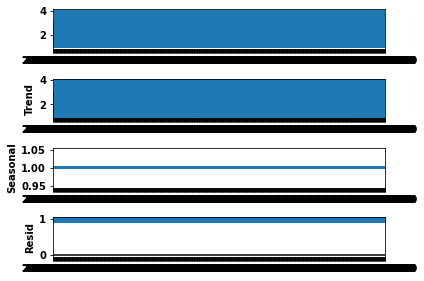

In [11]:
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

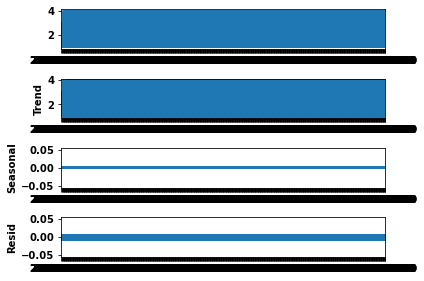

In [12]:
decompose_result_add = seasonal_decompose(analysis,model='additive',period=1)
decompose_result_add.plot();

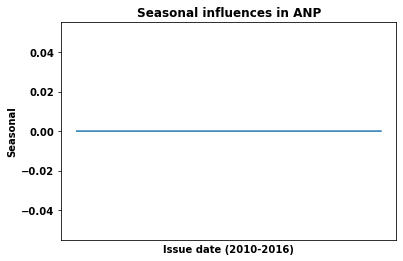

In [13]:
decompose_result_add.seasonal.plot();
plt.xticks([]);
plt.xlabel('Issue date (2010-2016)')
plt.ylabel('Seasonal')
plt.title('Seasonal influences in ANP');

**product category by week**

In [14]:
# is product category important? sum by week. 
product_week = data[['product_num', 'week', 'month', 'year', 'ANP']].groupby(by='week').sum().reset_index()
product_week

,week,product_num,month,year,ANP
0,1,871,461,728326,1.683885e+07
1,2,458,224,450956,9.660095e+06
2,3,442,207,416632,7.750650e+06
3,4,535,248,499215,9.901785e+06
4,5,896,671,800799,1.924647e+07
5,6,473,432,434808,8.278534e+06
6,7,499,460,462975,9.825304e+06
7,8,479,450,452864,1.001534e+07
8,9,866,992,795012,1.990126e+07
9,10,358,549,368385,8.242585e+06


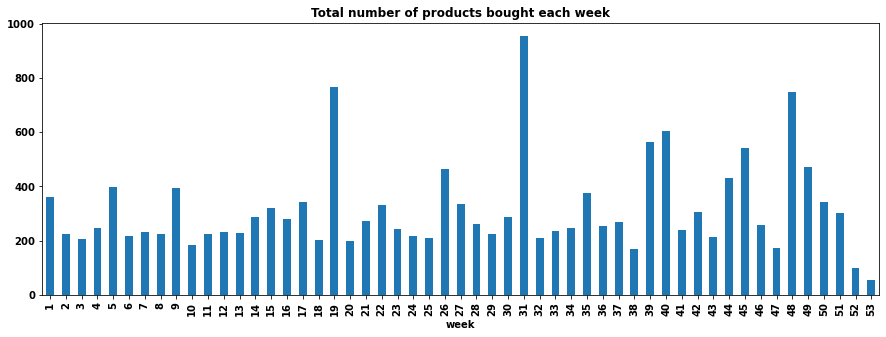

In [15]:
week_groups = data.groupby([data['week']])['product_category'].count()
week_groups.plot(kind='bar',figsize=(15,5),legend=None);
plt.title('Total number of products bought each week');

**product category by month**

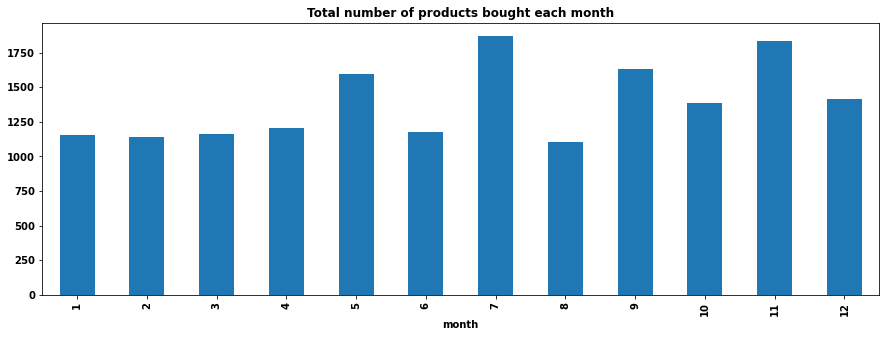

In [16]:
month_groups = data.groupby([data['month']])['product_category'].count()
month_groups.plot(kind='bar',figsize=(15,5),legend=None);
plt.title('Total number of products bought each month');

**product category by year**

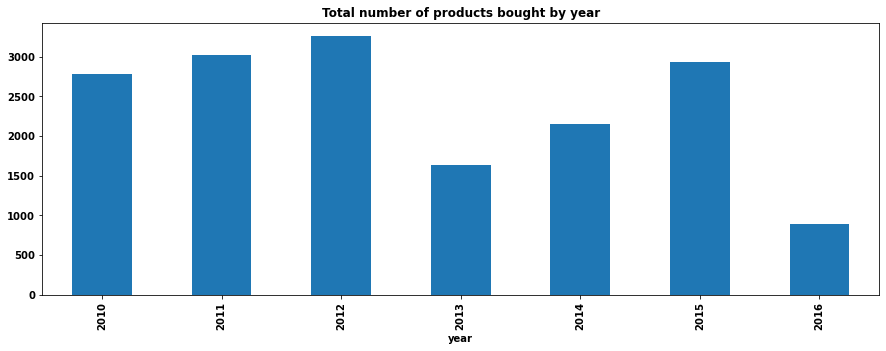

In [17]:
year_groups = data.groupby([data['year']])['product_category'].count()
year_groups.plot(kind='bar',figsize=(15,5),legend=None);
plt.title('Total number of products bought by year');

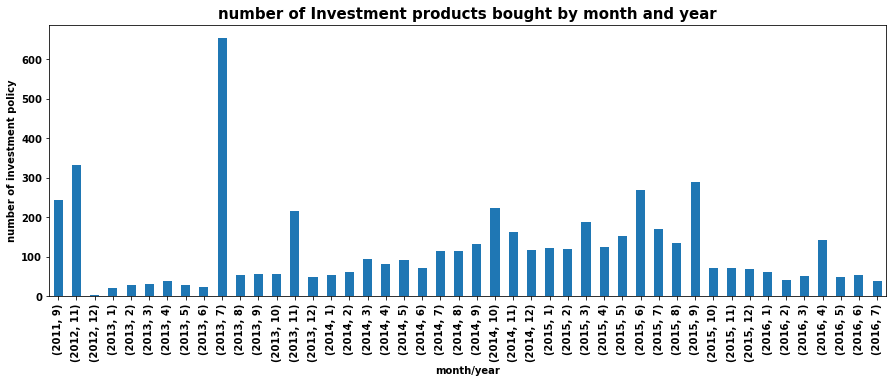

In [18]:
data[data['product_category'] == 'Investment'][['month','year']].groupby(['year','month']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('month/year',fontsize=10);
plt.xticks(rotation='90',fontsize=10);
plt.ylabel('number of investment policy',fontsize=10)
plt.title('number of Investment products bought by month and year',fontsize=15); 

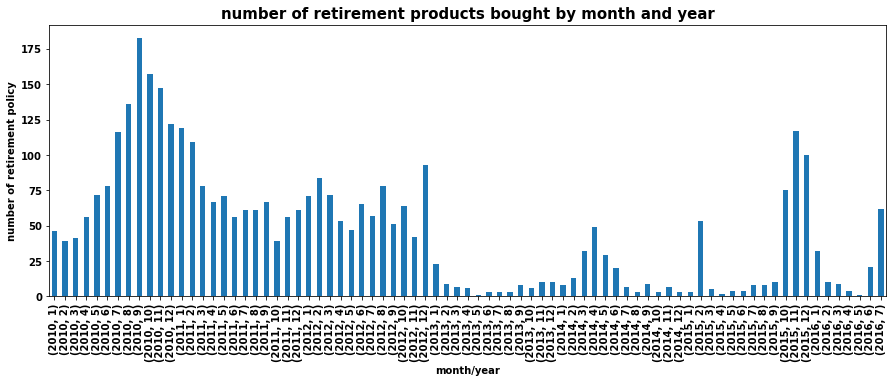

In [19]:
data[data['product_category'] == 'Retirement'][['month','year']].groupby(['year','month']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('month/year',fontsize=10);
plt.xticks(rotation='90',fontsize=10);
plt.ylabel('number of retirement policy',fontsize=10)
plt.title('number of retirement products bought by month and year',fontsize=15); 

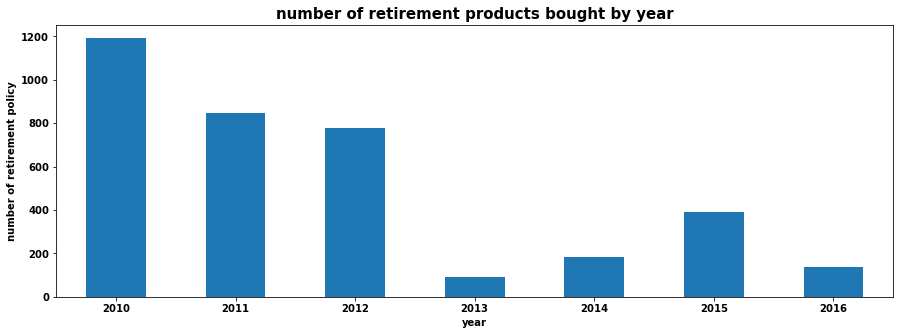

In [20]:
data[(data['product_category'] == 'Retirement')][['year']].groupby(['year']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('year',fontsize=10);
plt.xticks(rotation='horizontal',fontsize=10);
plt.ylabel('number of retirement policy',fontsize=10)
plt.title('number of retirement products bought by year',fontsize=15); 

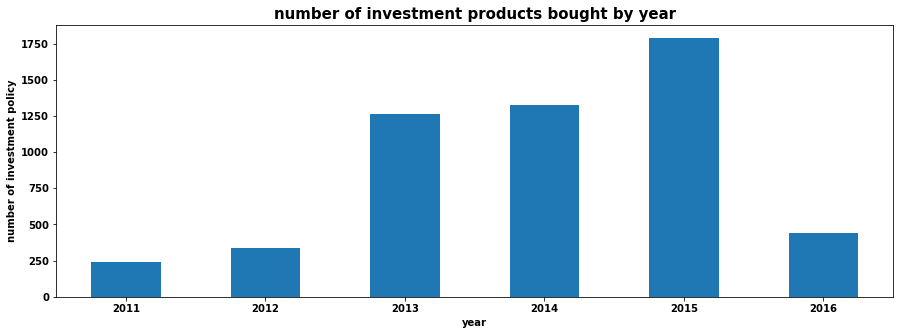

In [21]:
data[(data['product_category'] == 'Investment')][['year']].groupby(['year']).size().plot(kind='bar',figsize=(15,5));
plt.xlabel('year',fontsize=10);
plt.xticks(rotation='horizontal',fontsize=10);
plt.ylabel('number of investment policy',fontsize=10)
plt.title('number of investment products bought by year',fontsize=15); 

Most ANP can be earned from Investment policies and Retirement policies.

In [22]:
data[data['product_category'] == 'Health'][['basic_cover_type']].value_counts()

basic_cover_type     
DREAD DISEASE            57
DAILY HOSPITALIZATION    10
MEDICAL EXPENSES         10
dtype: int64

In [23]:
data[data['product_category'] == 'Investment'][['basic_cover_type']].value_counts()

basic_cover_type
UNIT LINK           5395
dtype: int64

In [24]:
data[data['product_category'] == 'Protection'][['basic_cover_type']].value_counts()

basic_cover_type            
ACC DEATH & DISMEMBERMENT       1851
LIVING BENEFIT                  1651
PAYOR'S BENEFIT                 1247
WAIVER OF PREMIUM DISABILITY     711
TERM LIFE                        575
WHOLE LIFE                       436
SPECIAL ACCIDENT RIDER            48
ACCIDENTAL DEATH                  30
TERM RIDER                        28
DECREASING TERM RIDER             11
ACC TPD                           10
dtype: int64

In [25]:
data[data['product_category'] == 'Retirement'][['basic_cover_type']].value_counts()

basic_cover_type     
ANTICIPATED ENDOWMENT    3615
dtype: int64

In [26]:
data[data['product_category'] == 'Savings'][['basic_cover_type']].value_counts()

basic_cover_type
DEPOSIT FUND        508
ENDOWMENT           468
ENDOWMENT RIDER      10
dtype: int64

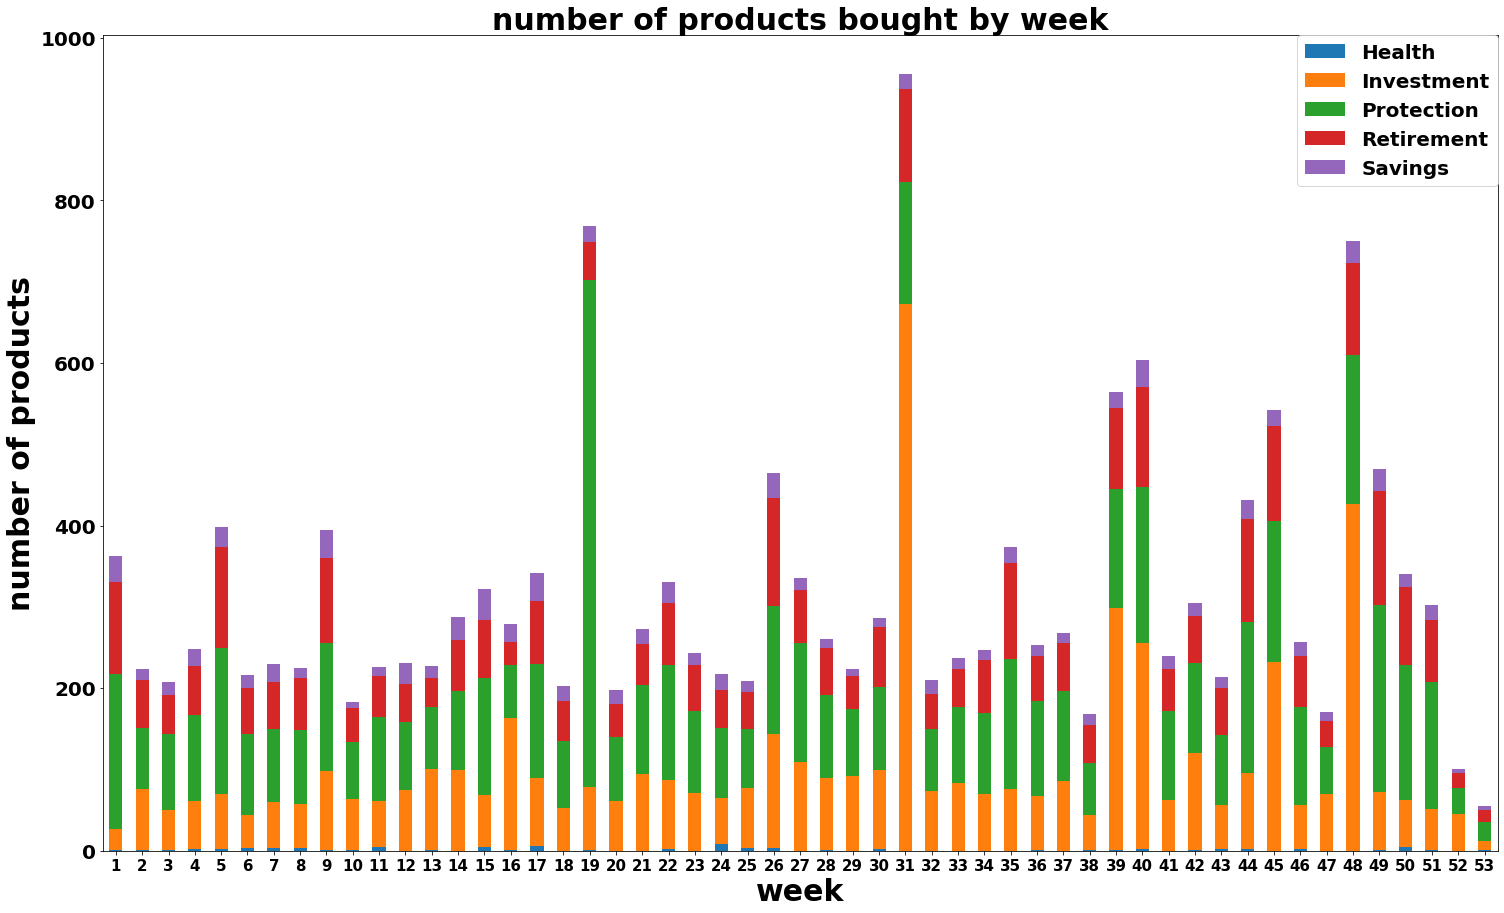

In [27]:
df_week = pd.pivot_table(data[['week','product_category','ANP']], index='week', columns='product_category', values = 'ANP' , aggfunc='count')
df_week.plot.bar(stacked=True, figsize=(25,15));
plt.legend(bbox_to_anchor=(1,1),loc='upper right',borderaxespad=0,fontsize=20);
plt.xlabel('week',fontsize=30)
plt.xticks(rotation='horizontal',fontsize=15)
plt.ylabel('number of products',fontsize=30);
plt.yticks(fontsize=20)
plt.title('number of products bought by week',fontsize=30); 

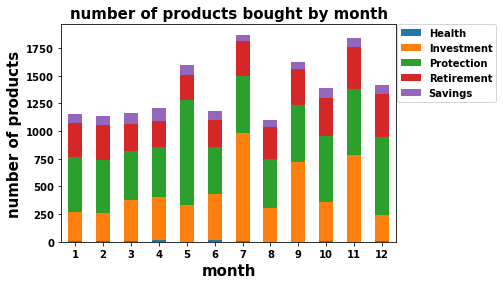

In [28]:
df_month = pd.pivot_table(data[['month','product_category','ANP']], index='month', columns='product_category', values = 'ANP' , aggfunc='count')
df_month.plot.bar(stacked=True);
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right',borderaxespad=0);
plt.xlabel('month',fontsize=15)
plt.xticks(rotation='horizontal',fontsize=10)
plt.ylabel('number of products',fontsize=15);
plt.yticks(fontsize=10)
plt.title('number of products bought by month',fontsize=15);

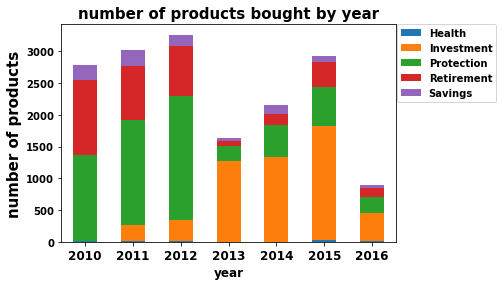

In [29]:
df_year = pd.pivot_table(data[['year','product_category','ANP']], index='year', columns='product_category', values = 'ANP' , aggfunc='count')
df_year.plot.bar(stacked=True);
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right',borderaxespad=0);
plt.xlabel('year',fontsize=12)
plt.xticks(rotation='horizontal',fontsize=12)
plt.ylabel('number of products',fontsize=15);
plt.yticks(fontsize=10)
plt.title('number of products bought by year',fontsize=15);

In [30]:
# # double checking 
# data[(data['product_category'] == 'Retirement')  & (data['year'] == 2016)]

In [31]:
# # double checking 
# data[data['product_category'] == 'Health'].groupby('year').count()

### Customer segmentation

A new customer wants to buy life insurance. He comes into the firm and fills in basic demographic information about himself, such as age, gender and employment status, retirement plans, homeownership status, vehicle ownership and behavioural data (questions about the lifestyle of the individual). 

KMeans algorithm addresses the problem linked to how to classify the new customer in terms of what segment does he belong to. Once he can be classified then the KMeans algorithm will also help estimate how much the yearly/monthly premiums should be. 

In [32]:
# possible owner features of interest
# 'nationality_dummy'
# 'region_dummy'
# 'owner_age'
# 'owner_gender'
# 'class_order'
# 'relationship_bin'
# 'ANP'

**owner_gender**

In [33]:
data['owner_gender'].unique()

array(['F', 'M'], dtype=object)

In [34]:
# convert gender to numerical
data['owner_gender']=data['owner_gender'].apply(lambda x: 1 if x=='M' else 0)

**occupation_class**

In [35]:
data['occupation_class'].unique()

array(['HOSPITAL, NURSING HOME, CLINIC, ASSYLUM', 'STUDENT',
       'LAWYER, ATTORNEY', 'LAWYER,ATTORNEY',
       'BUSINESSMAN/ / BUSINESSWOMAN', 'BANK', 'PENSIONER',
       'OFFICE WORKER', 'ENGINEER', 'UNEMPLOYED', 'HOUSEWIFE',
       'AGRICULTURE', 'ACCOUNTANT', 'DENTAL', 'OPTICIAN/OPTOMETRIST',
       'TEACHER, LECTURER, TUTOR, PROFESSOR', 'MARINE INDUSTRY',
       'JUVENILE', 'PRINTING & PUBLISHING',
       'HOSPITAL,NURSING HOME,CLINIC,ASSYLUM', 'SEAMAN / SEAFARER',
       'OVERSEAS CONTRACT WORKER (OCW)', 'COMPUTER INDUSTRY',
       'SALESPERSON', 'VETERINARY PRACTICE', 'DECORATOR, INTERIOR',
       'FASHION DESIGNER', 'RELIGIOUS GROUP',
       'BUSINESS MACHINES SALES & SERVICES', 'POLICE', 'SECURITY GUARD',
       'CASHIER', 'COLLECTOR', 'MERCHANT - RETAIL', 'TRAVEL INDUSTRY',
       'RICE, CORN, FEED & FLOUR MILLS (SEE GRAIN)', 'DRIVER',
       'ARCHITECT', 'AIR TRANSPORTATION', 'CONTRACTOR',
       'AUTOMOBILE INDUSTRY', 'POLITICIANS',
       'OIL AND NATURAL GAS INDUSTRY', 

In [36]:
# too broad 'occupation_class', 'owner_occupation_class' dropped, will use 'class_order' instead
data['class_order'].value_counts()

2     8653
1     2760
3     1413
4     1032
10     969
6      871
5      407
7      274
9      118
0      112
8       62
Name: class_order, dtype: int64

In [37]:
data['relationship'].unique()

array(['SELF', 'DAUGHTER', 'MOTHER', 'SISTER', 'FATHER', 'GRANDMOTHER',
       'BROTHER', 'SON', 'AUNT', 'GRANDFATHER', 'HUSBAND', 'GODMOTHER',
       'SPOUSE', 'WIFE', 'EMPLOYER', 'GRANDSON', 'NEPHEW', 'STEPFATHER',
       'MOTHER-IN-LAW', 'NIECE', 'PARENT', 'ADOPTED CHILD',
       'GRANDDAUGHTER', 'UNCLE', 'CHILD', 'STEPMOTHER', 'COUSIN',
       'GUARDIAN', 'OTHERS', 'GRAND-AUNT', 'MISSING'], dtype=object)

In [74]:
data['relationship_bin'].value_counts(normalize=True)

SELF             0.607882
PARENTS          0.321276
GRANDPARENTS     0.026153
CHILDREN         0.013377
RELATIVE         0.012057
SPOUSE           0.009358
EMPLOYER         0.004499
SIBLINGS         0.004079
GRANDCHILDREN    0.001140
OTHERS           0.000120
MISSING          0.000060
Name: relationship_bin, dtype: float64

should 'relationship_bin' be included and grouped? perhaps, drop 'relationship' and 'relationship_bin' features for now.

In [73]:
data['nationality_dummy'].value_counts(normalize=True)

NATIONALITY_ID_1     0.982245
NATIONALITY_ID_4     0.006718
NATIONALITY_ID_6     0.003119
NATIONALITY_ID_3     0.001979
NATIONALITY_ID_7     0.000840
NATIONALITY_ID_9     0.000600
NATIONALITY_ID_5     0.000540
NATIONALITY_ID_21    0.000480
NATIONALITY_ID_13    0.000360
NATIONALITY_ID_16    0.000300
NATIONALITY_ID_17    0.000300
NATIONALITY_ID_15    0.000300
NATIONALITY_ID_20    0.000240
NATIONALITY_ID_11    0.000240
NATIONALITY_ID_22    0.000240
NATIONALITY_ID_34    0.000180
NATIONALITY_ID_31    0.000180
NATIONALITY_ID_24    0.000180
NATIONALITY_ID_35    0.000120
NATIONALITY_ID_18    0.000120
NATIONALITY_ID_28    0.000120
NATIONALITY_ID_29    0.000060
NATIONALITY_ID_14    0.000060
NATIONALITY_ID_26    0.000060
NATIONALITY_ID_25    0.000060
NATIONALITY_ID_12    0.000060
NATIONALITY_ID_27    0.000060
NATIONALITY_ID_23    0.000060
NATIONALITY_ID_10    0.000060
NATIONALITY_ID_19    0.000060
NATIONALITY_ID_30    0.000060
Name: nationality_dummy, dtype: float64

chances are ID_1 is the Phillipines or capital city. 

ID_1 dominates nationality, so not useful. 

In [42]:
data['region_dummy'].value_counts()

REGION_10    2963
REGION_14    2423
REGION_3     2043
REGION_2     1667
REGION_1     1600
REGION_11    1550
REGION_12    1445
REGION_8     1279
REGION_13    1077
REGION_15     534
REGION_4       29
REGION_18      24
REGION_23      21
REGION_22       6
REGION_5        3
REGION_16       3
REGION_6        2
REGION_20       1
REGION_19       1
Name: region_dummy, dtype: int64

region may be more helpful, given a more even spread of customers from some regions.

KMeans works only with continuous variables. Other types (like gender, class_order, region) is already pushing it. 
<br> but 3+ features per customer would provide more insights.

In [43]:
# customer segmentation features
features = ['region_dummy','owner_age','owner_gender','class_order','ANP']
cust_data = data[features]

'ANP' will perhaps give idea of spending score of a person. 

In [44]:
cust_data.head(10)

,region_dummy,owner_age,owner_gender,class_order,ANP
0,REGION_2,53.0,0,4,161515.0
1,REGION_10,50.0,0,10,26745.0
2,REGION_10,50.0,0,10,443.0
3,REGION_10,50.0,0,10,0.0
4,REGION_10,61.0,0,3,44170.0
5,REGION_10,60.0,0,3,30000.0
6,REGION_14,34.0,0,2,100000.0
7,REGION_12,42.0,0,2,25000.0
8,REGION_3,56.0,1,2,25000.0
9,REGION_15,28.0,0,2,50000.0


In [45]:
cust_data['region'] = data['region_dummy'].replace({'REGION_':''},regex=True).astype(int)

<ipython-input-45-a6f272dc4a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['region'] = data['region_dummy'].replace({'REGION_':''},regex=True).astype(int)


In [46]:
cust_data.drop(columns=['region_dummy'],inplace=True)

C:\Users\USER\anaconda3\envs\dsi24\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
cust_data.head()

,owner_age,owner_gender,class_order,ANP,region
0,53.0,0,4,161515.0,2
1,50.0,0,10,26745.0,10
2,50.0,0,10,443.0,10
3,50.0,0,10,0.0,10
4,61.0,0,3,44170.0,10


In [48]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_age     16671 non-null  float64
 1   owner_gender  16671 non-null  int64  
 2   class_order   16671 non-null  int64  
 3   ANP           16671 non-null  float64
 4   region        16671 non-null  int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 586.2 KB


In [49]:
# standard scaler age and ANP
col = ['owner_age','ANP']
ss_features = cust_data[col]
scaler = StandardScaler().fit(ss_features.values)
ss_features = scaler.transform(ss_features.values)
scaled_features = pd.DataFrame(ss_features, columns = col)
scaled_features.reset_index()

,index,owner_age,ANP
0,0,0.757675,1.050262
1,1,0.517396,-0.180560
2,2,0.517396,-0.420770
3,3,0.517396,-0.424815
4,4,1.398417,-0.021422
...,...,...,...
16666,16666,-0.363624,1.958694
16667,16667,-0.363624,-0.396552
16668,16668,-0.523810,0.302462
16669,16669,-0.523810,-0.411609


In [50]:
# checking rows
scaled_features.shape

(16671, 2)

In [51]:
temp = cust_data[['owner_gender','class_order','region']].reset_index()
X = pd.concat([scaled_features,temp],ignore_index=False,axis=1)

In [52]:
X.head(10)

,owner_age,ANP,index,owner_gender,class_order,region
0,0.757675,1.050262,0,0,4,2
1,0.517396,-0.180560,1,0,10,10
2,0.517396,-0.420770,2,0,10,10
3,0.517396,-0.424815,3,0,10,10
4,1.398417,-0.021422,4,0,3,10
5,1.318324,-0.150833,5,0,3,10
6,-0.764088,0.488460,6,0,2,14
7,-0.123346,-0.196497,7,0,2,12
8,0.997953,-0.196497,8,1,2,3
9,-1.244645,0.031822,9,0,2,15


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_age     16671 non-null  float64
 1   ANP           16671 non-null  float64
 2   index         16671 non-null  int64  
 3   owner_gender  16671 non-null  int64  
 4   class_order   16671 non-null  int64  
 5   region        16671 non-null  int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 716.5 KB


In [54]:
X = X.drop(columns=['index'])

In [55]:
# X.info()

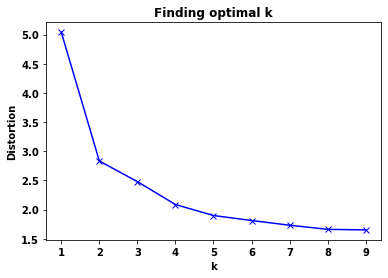

In [56]:
# KMeans
# determine k
distortions = []
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k, init='k-means++').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(distance.cdist(X,kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k');

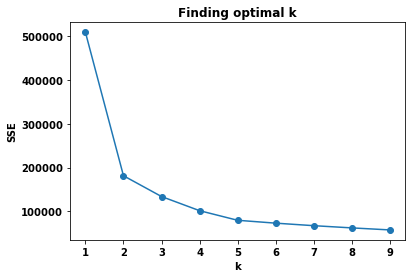

In [57]:
SSE = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Finding optimal k');

optimal number of k=5

In [58]:
# Build a model with 5 clusters
kmeans = KMeans(n_clusters = 5, init='k-means++')
clusters = kmeans.fit_predict(X)

# print silhouette score of modek
print(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

0.44557147947270076


Silhouette score is 0.45, not bad at all.

In [59]:
X['label'] = clusters
cust_data['label'] = clusters

<ipython-input-59-083a732311b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data['label'] = clusters


In [60]:
cust_data['label'].value_counts()

1    5139
2    4691
0    4474
4    1499
3     868
Name: label, dtype: int64

In [61]:
cust_data.head(10)

,owner_age,owner_gender,class_order,ANP,region,label
0,53.0,0,4,161515.0,2,0
1,50.0,0,10,26745.0,10,4
2,50.0,0,10,443.0,10,4
3,50.0,0,10,0.0,10,4
4,61.0,0,3,44170.0,10,1
5,60.0,0,3,30000.0,10,1
6,34.0,0,2,100000.0,14,2
7,42.0,0,2,25000.0,12,2
8,56.0,1,2,25000.0,3,0
9,28.0,0,2,50000.0,15,2


In [62]:
# average of clusters
avg_df = cust_data.groupby(['label'],as_index=False).median()
avg_df

,label,owner_age,owner_gender,class_order,ANP,region
0,0,45.0,0,2,22065.00,2
1,1,44.0,0,2,22040.00,10
2,2,42.0,0,2,19184.76,14
3,3,41.0,0,7,20000.00,3
4,4,40.0,0,8,15821.60,12


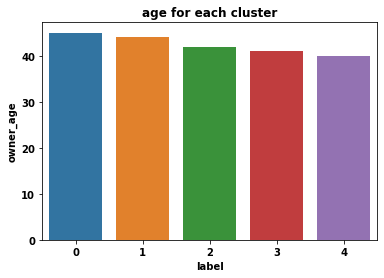

In [63]:
sns.barplot(x='label',y='owner_age',data=avg_df);
plt.title('age for each cluster');

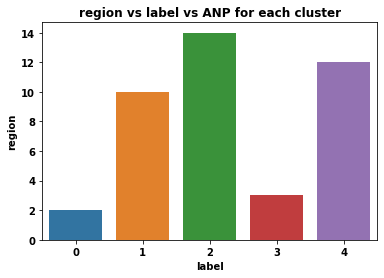

In [64]:
sns.barplot(x='label',y='region',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [65]:
cust_data[cust_data['label'] == 1][['region']].value_counts()

region
10        2597
11        1325
8         1215
6            2
dtype: int64

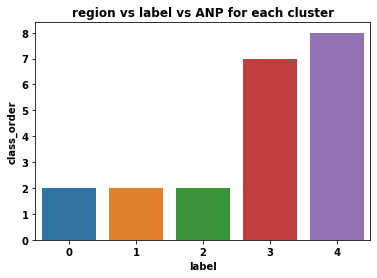

In [66]:
sns.barplot(x='label',y='class_order',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [67]:
cust_data[cust_data['label'] == 4][['class_order']].value_counts()

class_order
10             654
6              514
7              172
9               95
8               49
5               15
dtype: int64

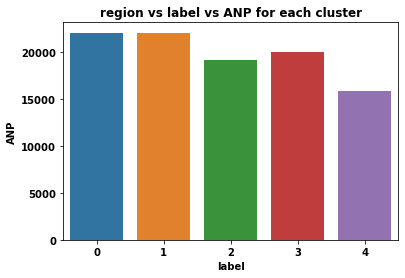

In [68]:
sns.barplot(x='label',y='ANP',data=avg_df);
plt.title('region vs label vs ANP for each cluster');

In [69]:
# predominantly female in all clusters
df_gender = pd.DataFrame(cust_data.groupby(['label','owner_gender'])['owner_gender'].count())
df_gender

owner_gender
label owner_gender              
0     0                     3072
      1                     1402
1     0                     3352
      1                     1787
2     0                     3157
      1                     1534
3     0                      463
      1                      405
4     0                      952
      1                      547

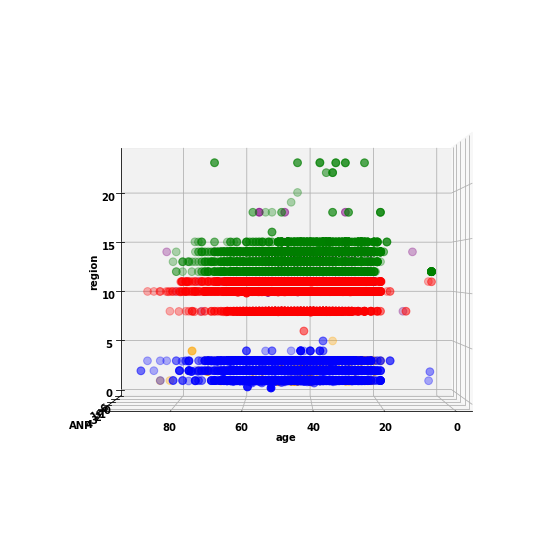

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_data.owner_age[cust_data.label == 0], cust_data['ANP'][cust_data.label == 0], cust_data['region'][cust_data.label == 0], c='blue', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 1], cust_data['ANP'][cust_data.label == 1], cust_data['region'][cust_data.label == 1], c='red', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 2], cust_data['ANP'][cust_data.label == 2], cust_data['region'][cust_data.label == 2], c='green', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 3], cust_data['ANP'][cust_data.label == 3], cust_data['region'][cust_data.label == 3], c='orange', s=60)
ax.scatter(cust_data.owner_age[cust_data.label == 4], cust_data['ANP'][cust_data.label == 4], cust_data['region'][cust_data.label == 4], c='purple', s=60)
ax.view_init(0, 90)
plt.xlabel('age')
plt.ylabel('ANP')
ax.set_zlabel('region')
plt.show()

With a few outliers, there is an obvious segregation due to region. 

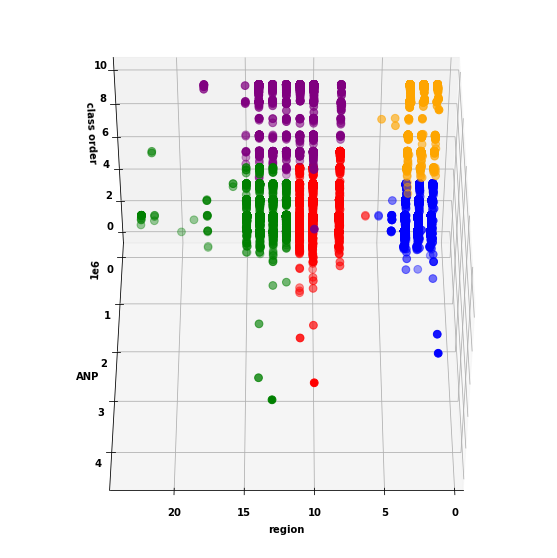

In [71]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_data.region[cust_data.label == 0], cust_data['ANP'][cust_data.label == 0], cust_data['class_order'][cust_data.label == 0], c='blue', s=60)
ax.scatter(cust_data.region[cust_data.label == 1], cust_data['ANP'][cust_data.label == 1], cust_data['class_order'][cust_data.label == 1], c='red', s=60)
ax.scatter(cust_data.region[cust_data.label == 2], cust_data['ANP'][cust_data.label == 2], cust_data['class_order'][cust_data.label == 2], c='green', s=60)
ax.scatter(cust_data.region[cust_data.label == 3], cust_data['ANP'][cust_data.label == 3], cust_data['class_order'][cust_data.label == 3], c='orange', s=60)
ax.scatter(cust_data.region[cust_data.label == 4], cust_data['ANP'][cust_data.label == 4], cust_data['class_order'][cust_data.label == 4], c='purple', s=60)
ax.view_init(45, 90)
plt.xlabel('region')
plt.ylabel('ANP')
ax.set_zlabel('class order')
plt.show()